# 실습 코드

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.datasets import make_circles
import pandas as pd
import numpy as np

### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def vis_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['trans1'], y=label_cluster['trans2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

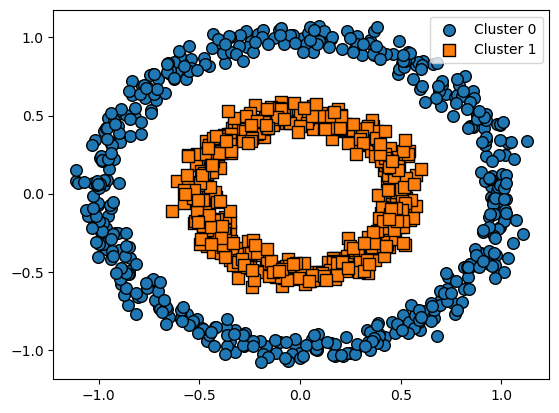

In [3]:
# 실험을 위한 데이터 생성

# 2개의 원 그리는 코드
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['trans1', 'trans2'])
clusterDF['target'] = y

# 그린 원 시각화
vis_cluster_plot(None, clusterDF, 'target', iscenter=False)

In [1]:
import os

os.environ['OMP_NUM_THREADS'] = '4'

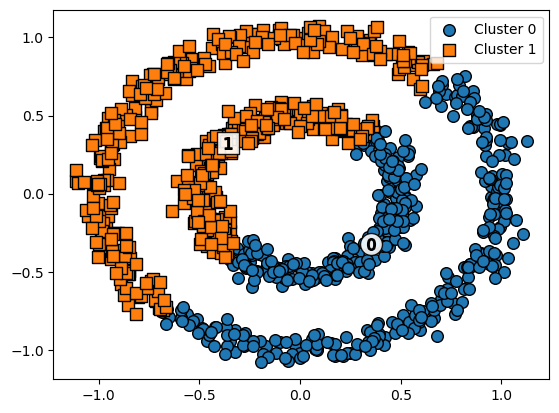

In [4]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 

from sklearn.cluster import KMeans

# Kmeans 군집분석 객체 생성 k=2
kmeans = KMeans(n_clusters=2, random_state=0)
# X에 대해 학습(fit_predict)
kmeans_labels = kmeans.fit_predict(X)

# 학습 결과 저장
clusterDF['kmeans_cluster'] = kmeans_labels

# KMeans 시각화(모델, 학습결과 데이터, 'plt제목', 중심점좌표 표시여부(True/False))
vis_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

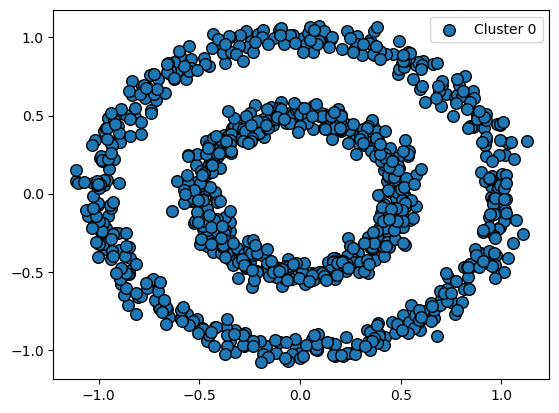

In [15]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

# DBSCAN 군집분석 객체 생성()
dbscan = DBSCAN()

# X에 대해 학습
dbscan_labels = dbscan.fit_predict(X)

# 학습 결과 저장
clusterDF['dbscan_cluster'] = dbscan_labels

# 시각화
vis_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)